<a href="https://colab.research.google.com/github/ThalesCavalcanti/MachineLearningGroundwork/blob/main/Parte_1_9_Classificac%CC%A7a%CC%83o_Avaliac%CC%A7a%CC%83o_dos_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Reconecte ao Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DRIVE_DIRECTORY = "curso_ml"
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive/cursoML", DRIVE_DIRECTORY)

---

In [3]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import f_oneway, shapiro
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.multicomp import MultiComparison

# Avaliação dos algoritmos

## Tuning dos parâmetros com GridSearch

### Preparação dos dados

Comece recarregando as variáveis `X` e `y`, dos splits `train` e `test`, a partir do arquivo salvo `cover_type.pkl`.

In [4]:
with open(os.path.join(DRIVE_DIRECTORY, "cover_type.pkl"), "rb") as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

Inspecione o `shape` desses objetos.

In [5]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((2500, 53), (7500, 53), (2500,), (7500,))

Junte as variáveis preditoras em uma única variável `X`, e inspecione seu `shape`.

In [6]:
X = np.concatenate((X_train, X_test), axis=0)
X.shape

(10000, 53)

Junte a variável alvo em uma única variável `y`, e inspecione seu `shape`.

In [7]:
y = np.concatenate((y_train, y_test), axis=0)
y.shape


(10000,)

### Árvore de decisão

Estabeleça um dicionário `parameters` com os parâmetros a investigar durante o Grid Search. Você pode usar os mesmos parâmetros utilizados na aula, ou outros parâmetros. Para escolher outros parâmetros, visualize as possibilidades na documentação da classe `DecisionTreeClassifier`.

In [8]:
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}

Crie uma instância da classe `GridSearch`, informando uma instância de `DecisionTreeClassifier` como o estimador, e os parâmetros definidos acima como grid de pesquisa. Inclua os parâmetros `verbose=True` para exibir informações sobre o processo, e `n_jobs=-1` para fazer a pesquisa de parâmetros de forma paralela, utilizando todas as CPUs disponíveis no ambiente de computação. Desta vez, salve a instância com o nome `grid_search_tree`, porque você vai utilizar os resultados do Grid Search mais pra frente.

In [9]:
grid_search_tree =GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, verbose=True, n_jobs=1)

Faça o ajuste dessa instância, passando as variáveis `X` e `y`.

In [10]:
grid_search_tree.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=True)

Recupere os melhores parâmetros e os melhores resultados, e exiba esses valores.

In [11]:
best_parameters = grid_search_tree.best_params_
best_results = grid_search_tree.best_score_
print(best_parameters)
print(best_results)


{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
0.7315


### Random forest

Repita o exercício utilizando `RandomForestClassifier`. Também chame a instância de `GridSearchCV` fazendo referência ao nome do algoritmo utilizado.

In [12]:
parameters = parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [13]:
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, verbose=True, n_jobs=1)
grid_search_rf.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 40, 100, 150]},
             verbose=True)

In [14]:
best_parameters = grid_search_rf.best_params_
best_results = grid_search_rf.best_score_
print(best_parameters)
print(best_results)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.8158


### KNN

Repita o exercício utilizando `KNeighborsClassifier`.

In [15]:
parameters = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

In [16]:
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, verbose=True, n_jobs=1)
grid_search_knn.fit(X, y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [17]:
best_parameters = grid_search_knn.best_params_
best_results = grid_search_knn.best_score_
print(best_parameters)
print(best_results)

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.7836000000000001


### Regressão logística

Repita o exercício utilizando `LogisticRegression`.

In [18]:
parameters = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [19]:
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, verbose=True, n_jobs=1)
grid_search_lr.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [1.0, 1.5, 2.0],
                         'solver': ['lbfgs', 'sag', 'saga'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             verbose=True)

In [20]:
best_parameters = grid_search_lr.best_params_
best_results = grid_search_lr.best_score_
print(best_parameters)
print(best_results)

{'C': 2.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.7224999999999999


### SVM

Repita o exercício utilizando `SVC`.

In [21]:
parameters = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [22]:
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=parameters, verbose=True, n_jobs=-1)
grid_search_svm.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 2.0],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=True)

In [23]:
best_parameters = grid_search_svm.best_params_
best_results = grid_search_svm.best_score_
print(best_parameters)
print(best_results)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.0001}
0.7734


### Rede neural

Repita o exercício utilizando `MLPClassifier`.

In [24]:
parameters = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [25]:
grid_search_nn = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters, verbose=True, n_jobs=-1)
grid_search_nn.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'tahn'],
                         'batch_size': [10, 56], 'solver': ['adam', 'sgd']},
             verbose=True)

In [26]:
best_parameters = grid_search_nn.best_params_
best_results = grid_search_nn.best_score_
print(best_parameters)
print(best_results)

{'activation': 'logistic', 'batch_size': 10, 'solver': 'adam'}
0.7881


## Validação cruzada

Agora repita o exemplo da validação cruzada, usando o mesmo método e os mesmos parâmetros utilizados na aula. Entretanto, para limitar o tempo de execução, estou deixando comentados os algoritmos DecisionTree e SVM, e repetindo por apenas 10 loops. Você pode modificar esses valores se quiser.

In [27]:
decision_tree_results = []
random_forest_results = []
knn_results = []
logistic_results = []
svm_results = []
neural_net_results = []

for i in range(10):
    print(f">>>>> LOOP {i} <<<<<\n")
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(tree, X, y, cv = kfold)
    decision_tree_results.append(scores.mean())

    random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    random_forest_results.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, X, y, cv = kfold)
    knn_results.append(scores.mean())

    lr = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
    scores = cross_val_score(lr, X, y, cv = kfold)
    logistic_results.append(scores.mean())

    svm = SVC(kernel = 'rbf', C = 2.0)
    scores = cross_val_score(svm, X, y, cv = kfold)
    svm_results.append(scores.mean())

    neural_net = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
    scores = cross_val_score(neural_net, X, y, cv = kfold)
    neural_net_results.append(scores.mean())

>>>>> LOOP 0 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>>>>> LOOP 1 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>>>>> LOOP 2 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>>>>> LOOP 3 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>>>>> LOOP 4 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>>>>> LOOP 5 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>>>>> LOOP 6 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>>>>> LOOP 7 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>>>>> LOOP 8 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

>>>>> LOOP 9 <<<<<



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Consolide os resultados em um DataFrame, com o nome do método sendo o rótulo das colunas.

In [28]:
results = pd.DataFrame({
    'Decision tree': decision_tree_results,
    'Random forest': random_forest_results,
    'KNN': knn_results,
    'Logistic': logistic_results,
    'SVM': svm_results,
    'Neural net': neural_net_results
    })
results

,Decision tree,Random forest,KNN,Logistic,SVM,Neural net
0,0.7275,0.7895,0.7546,0.7230,0.7746,0.7855
1,0.7223,0.7880,0.7522,0.7234,0.7770,0.7847
2,0.7310,0.7864,0.7588,0.7237,0.7716,0.7787
3,0.7242,0.7847,0.7531,0.7249,0.7739,0.7808
4,0.7292,0.7832,0.7556,0.7219,0.7752,0.7808
5,0.7306,0.7846,0.7581,0.7213,0.7748,0.7813
6,0.7296,0.7880,0.7561,0.7238,0.7758,0.7835
7,0.7298,0.7887,0.7582,0.7236,0.7749,0.7778
8,0.7315,0.7847,0.7547,0.7208,0.7729,0.7815
9,0.7268,0.7836,0.7549,0.7219,0.7734,0.7784


Exiba as estatísticas básicas para cada método no DataFrame.

In [29]:
results.describe()

,Decision tree,Random forest,KNN,Logistic,SVM,Neural net
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.728250,0.786140,0.755630,0.722830,0.774410,0.781300
std,0.003041,0.002272,0.002201,0.001296,0.001533,0.002625
min,0.722300,0.783200,0.752200,0.720800,0.771600,0.777800
25%,0.726975,0.784625,0.754625,0.721900,0.773525,0.779225
50%,0.729400,0.785550,0.755250,0.723200,0.774700,0.781050
75%,0.730400,0.788000,0.757600,0.723675,0.775125,0.783000
max,0.731500,0.789500,0.758800,0.724900,0.777000,0.785500


Exiba a variância de cada método.

In [30]:
results.var()

,0
Decision tree,0.000009
Random forest,0.000005
KNN,0.000005
Logistic,0.000002
SVM,0.000002
Neural net,0.000007


Exiba o desvio padrão dividido pela média de cada método, como um valor percentual.

In [31]:
(results.std() / results.mean()) * 100

,0
Decision tree,0.417616
Random forest,0.288964
KNN,0.291285
Logistic,0.179322
SVM,0.197949
Neural net,0.335936


## Teste de normalidade

Use o método de Shapiro para determinar se os resultados podem ser considerados amostras de uma distribuição normal.

In [32]:
shapiro(decision_tree_results)

ShapiroResult(statistic=np.float64(0.894287988599985), pvalue=np.float64(0.18941822538896325))

In [33]:
shapiro(random_forest_results)

ShapiroResult(statistic=np.float64(0.9081019292996836), pvalue=np.float64(0.2682061271883646))

In [34]:
shapiro(knn_results)

ShapiroResult(statistic=np.float64(0.9436763112020883), pvalue=np.float64(0.5945967687046025))

In [35]:
shapiro(logistic_results)

ShapiroResult(statistic=np.float64(0.9475707585751878), pvalue=np.float64(0.6398564661729798))

In [36]:
shapiro(svm_results)

ShapiroResult(statistic=np.float64(0.9869546220942478), pvalue=np.float64(0.9915487898145401))

In [37]:
shapiro(neural_net_results)

ShapiroResult(statistic=np.float64(0.9377489691850437), pvalue=np.float64(0.528248324668074))

Exiba um gráfico dos resultados utilizando a função `sns.displot`.

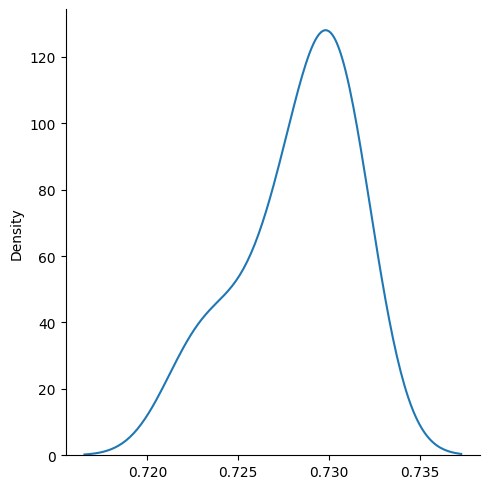

In [38]:
sns.displot(decision_tree_results, kind = 'kde');

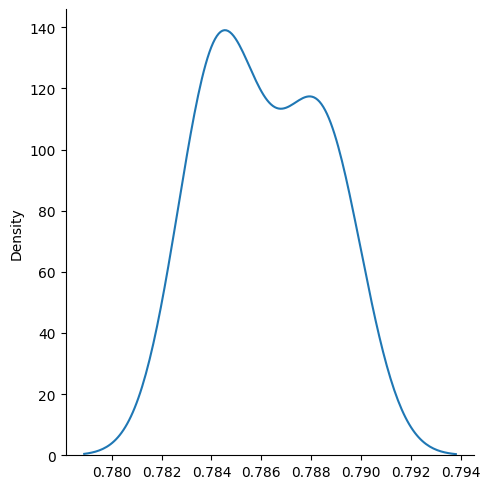

In [39]:
sns.displot(random_forest_results, kind = 'kde');

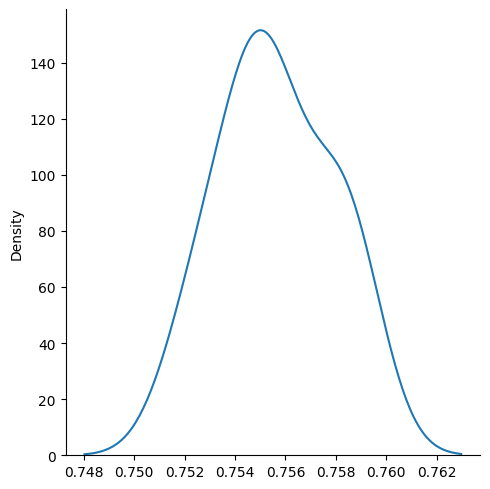

In [40]:
sns.displot(knn_results, kind = 'kde');

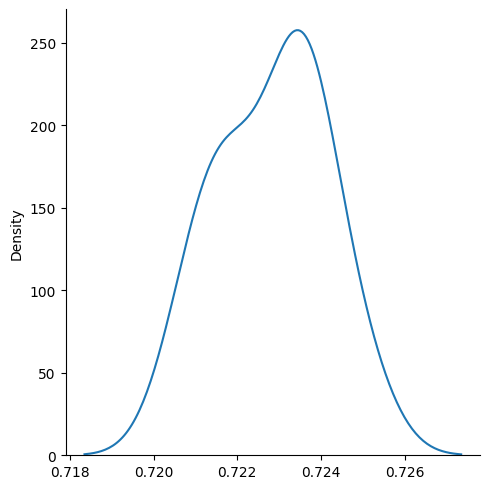

In [41]:
sns.displot(logistic_results, kind = 'kde');

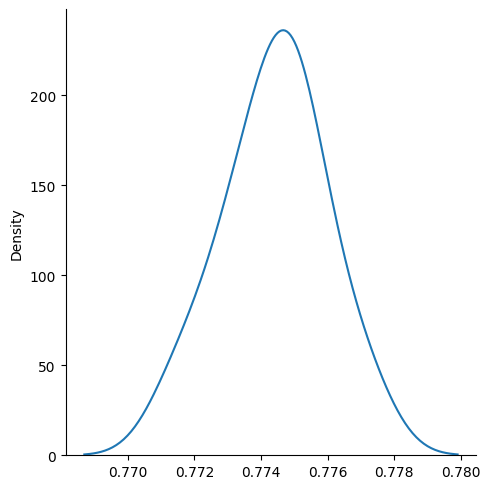

In [42]:
sns.displot(svm_results, kind = 'kde');

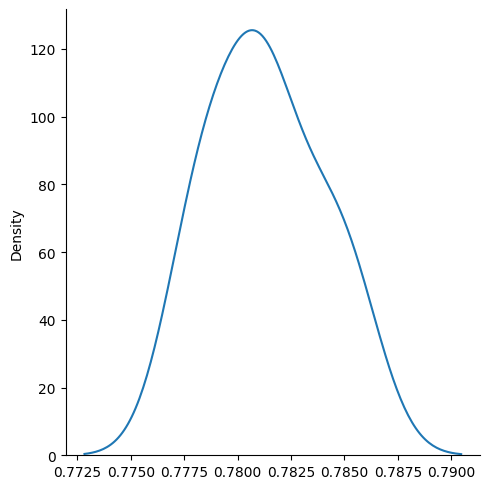

In [43]:
sns.displot(neural_net_results, kind = 'kde');

## Teste de hipótese com ANOVA e Tukey

Utilize o método ANOVA (one way) para determinar se os resultados são estatisticamente iguais ou se existe pelo menos um resultado diferente.

In [44]:
_, p = f_oneway(
    decision_tree_results,
    random_forest_results,
    knn_results,
    logistic_results,
    svm_results,
    neural_net_results
    )
p

np.float64(1.723848932288253e-56)

Considerando $alpha = 0.5$, qual a conclusão do teste?

Agora vamos utilizar o método `melt` do Pandas para reorganizar o dataframe de resultados.

In [45]:
results_df = results.melt(var_name='algorithm', value_name='accuracy')
results_df

,algorithm,accuracy
0,Decision tree,0.7275
1,Decision tree,0.7223
2,Decision tree,0.7310
3,Decision tree,0.7242
4,Decision tree,0.7292
5,Decision tree,0.7306
6,Decision tree,0.7296
7,Decision tree,0.7298
8,Decision tree,0.7315
9,Decision tree,0.7268


Utilize a classe `MultiComparison` para criar uma instância que será utilizada como base para comparar os algoritmos e seus resultados.

In [46]:
compare_algorithms = MultiComparison(results_df['accuracy'], results_df['algorithm'])

Utilize essa instância para determinar os resultados do teste de Tukey. Exiba os resultados.

In [47]:
statistical_test = compare_algorithms.tukeyhsd()
print(statistical_test)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
Decision tree           KNN   0.0274    0.0  0.0244  0.0303   True
Decision tree      Logistic  -0.0054    0.0 -0.0084 -0.0025   True
Decision tree    Neural net   0.0531    0.0  0.0501   0.056   True
Decision tree Random forest   0.0579    0.0  0.0549  0.0609   True
Decision tree           SVM   0.0462    0.0  0.0432  0.0491   True
          KNN      Logistic  -0.0328    0.0 -0.0358 -0.0298   True
          KNN    Neural net   0.0257    0.0  0.0227  0.0286   True
          KNN Random forest   0.0305    0.0  0.0275  0.0335   True
          KNN           SVM   0.0188    0.0  0.0158  0.0217   True
     Logistic    Neural net   0.0585    0.0  0.0555  0.0614   True
     Logistic Random forest   0.0633    0.0  0.0603  0.0663   True
     Logistic           SVM   0.0516    0.0  0.0486  0.0545   

Exiba a média dos resultados.

In [48]:
results.mean()

,0
Decision tree,0.72825
Random forest,0.78614
KNN,0.75563
Logistic,0.72283
SVM,0.77441
Neural net,0.78130


Exiba os resultados do teste estatístico em um plot.

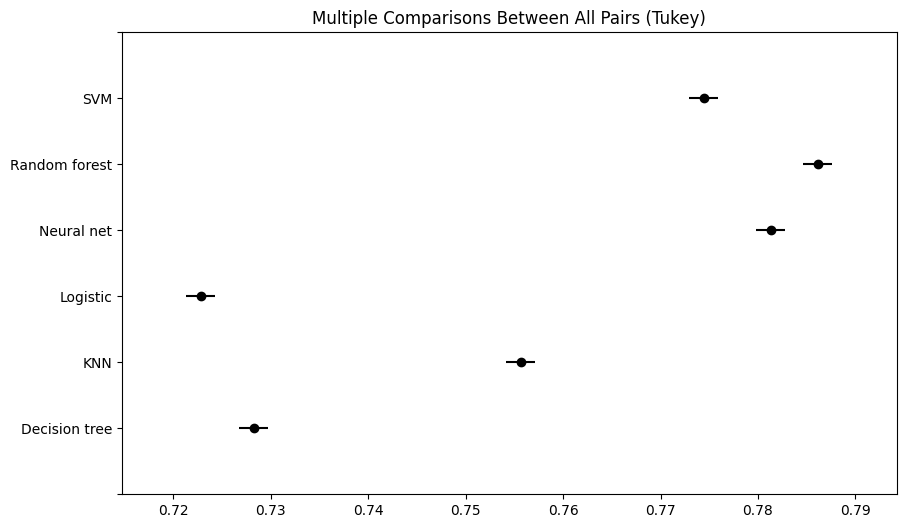

In [49]:
statistical_test.plot_simultaneous();

Quais conclusões são possíveis a partir desses resultados?

## Salvar um classificador treinado

Ao invés de retreinar um modelo, desta vez nós vamos recuperar um modelo já treinado anteriormente. Se você executou os exercícios até aqui, as instâncias de `GridSearchCV` contêm os melhores modelos encontrados no parâmetro `best_estimator_`. Vamos recuperar estes modelos.

In [50]:
tree = grid_search_tree.best_estimator_
tree

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5,
                       splitter='random')

In [51]:
rf = grid_search_rf.best_estimator_
rf

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [52]:
knn = grid_search_knn.best_estimator_
knn

KNeighborsClassifier(p=1, weights='distance')

In [53]:
lr = grid_search_lr.best_estimator_
lr

LogisticRegression(C=2.0)

In [54]:
svm = grid_search_svm.best_estimator_
svm

SVC(C=2.0, tol=0.0001)

In [55]:
neural_net = grid_search_nn.best_estimator_
neural_net

MLPClassifier(activation='logistic', batch_size=10)

Salve os classificadores na pasta do Drive.

In [56]:
pickle.dump(tree, open(os.path.join(DRIVE_DIRECTORY, "tree.sav"), "wb"))
pickle.dump(rf, open(os.path.join(DRIVE_DIRECTORY, "rf.sav"), "wb"))
pickle.dump(knn, open(os.path.join(DRIVE_DIRECTORY, "knn.sav"), "wb"))
pickle.dump(lr, open(os.path.join(DRIVE_DIRECTORY, "lr.sav"), "wb"))
pickle.dump(svm, open(os.path.join(DRIVE_DIRECTORY, "svm.sav"), "wb"))
pickle.dump(neural_net, open(os.path.join(DRIVE_DIRECTORY, "neural_net.sav"), "wb"))

Nós vamos recarregar e utilizar os modelos para fazer predições no próximo exercício.